<a href="https://colab.research.google.com/github/KalidaCh/Data-Warehouse-and-Big-Data-Analytics/blob/main/Text_Analytics_TW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

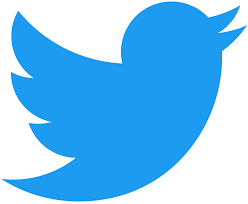

## Due Date: Sunday, September 25
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

In [ ]:
# Uncomment to install library if you have not done so
#!pip3 install wordcloud

In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Permit reading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')  # เชื่อม drive

Mounted at /content/drive


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.

#### Read JSON file

In [ ]:
# Specify the corresponding directory in your drive
file = open('/content/drive/My Drive/Colab Notebooks/DW_BDA_Project1/thailand_tweets.txt','r')
foo = file.read() 
data = json.loads(foo)
file.close()

In [ ]:
# inspect the file
print(data)

{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider", "cr

In [ ]:
data

'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

In [ ]:
type(data)

str

In [ ]:
# Convert the data object into dict if it is not in dict format
# Note: json.loads takes a string as input and 
#        returns a dictionary as output, 
#        while json.dumps take a dictionary as input and 
#        returns a string as output.
data_json = data
print("The data object type is",type(data_json)) 
while not isinstance(data_json, dict): #ตรวจสอบว่าข้อมูลเป็นชนิดที่เราคิดมั้ย
    # convert the data object into dict
    data_json = json.loads(data_json)
    print("After converting, the data object type is",type(data_json))

The data object type is <class 'str'>
After converting, the data object type is <class 'dict'>


#### Pretty print json/dict object

In [ ]:
pprint.pprint(data_json) # ทำให้  datadic อ่านได้ง่ายขึ้น

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

In fact, `pandas` has `pandas.read_json(<file_dir>) function to read json file into dataframe

In [ ]:
pd.read_json(StringIO(data), orient='index').head() #แปลง dict เป็น table

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


As we create a data dict, we can also read our data dict into a pandas dataframe

In [ ]:
pd.DataFrame.from_dict(data_json) # อยู่ในรูป  dic

,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
tweet_id,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
username,matthunter,DavSmithVP,DailyPattaya,Bryan62766077,Megan_and_Grrr,OhmPawatInter,nato_tonyo11,ThThitikarn61,Livetradingnews,DiscoverSoc,...,LDN327,Jay_beebee,Iovelydoll,jaemmrchv,Zeepruk_jfc,NFTLadyEve,AntzAntz1,taraxacumyx,IrfanHazard10,moanfIeur
name,MATT HUNTΞR,DavSmith / Virtual Photography,The Pattaya Daily,Bryan,Megan,OhmPawat International,nutri(BUSY SI ENGR.)| SoliD,thiti,Knightly News,Discover Society,...,LDN327,Jay Bee,,wonyoungiii | surprise cutie,ZeePruk_JapanFC（Rest）,NFTeVe,palito..showcase,Dandelion,Irfan Rapiansyah,
profile_picture,https://twitter.com/matthunter/photo,https://twitter.com/DavSmithVP/photo,https://twitter.com/DailyPattaya/photo,https://twitter.com/Bryan62766077/photo,https://twitter.com/Megan_and_Grrr/photo,https://twitter.com/OhmPawatInter/photo,https://twitter.com/nato_tonyo11/photo,https://twitter.com/ThThitikarn61/photo,https://twitter.com/Livetradingnews/photo,https://twitter.com/DiscoverSoc/photo,...,https://twitter.com/LDN327/photo,https://twitter.com/Jay_beebee/photo,https://twitter.com/Iovelydoll/photo,https://twitter.com/jaemmrchv/photo,https://twitter.com/Zeepruk_jfc/photo,https://twitter.com/NFTLadyEve/photo,https://twitter.com/AntzAntz1/photo,https://twitter.com/taraxacumyx/photo,https://twitter.com/IrfanHazard10/photo,https://twitter.com/moanfIeur/photo
replies,2,0,0,1,0,0,0,0,0,0,...,1,1,0,0,2,1,0,1,0,0
retweets,1,0,0,0,0,99,2,0,2,1,...,7,7,0,1,54,0,0,0,0,0
likes,7,2,0,1,0,143,18,0,3,0,...,5,7,3,0,32,1,0,0,0,0
is_retweet,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
posted_time,2022-08-30T23:59:57+00:00,2022-08-30T23:59:50+00:00,2022-08-30T23:59:45+00:00,2022-08-30T23:59:13+00:00,2022-08-30T23:58:15+00:00,2022-08-30T23:58:10+00:00,2022-08-30T23:57:50+00:00,2022-08-30T23:57:29+00:00,2022-08-30T23:56:30+00:00,2022-08-30T23:56:02+00:00,...,2022-08-30T23:53:35+00:00,2022-08-30T23:53:09+00:00,2022-08-30T23:52:59+00:00,2022-08-30T23:52:37+00:00,2022-08-30T23:49:48+00:00,2022-08-30T23:49:47+00:00,2022-08-30T23:49:07+00:00,2022-08-30T23:48:33+00:00,2022-08-30T23:48:13+00:00,2022-08-30T23:48:04+00:00
content,"Thanks for asking! Yes, we will support shippi...",Tomb Raider Underworld | Thailand \n#VirtualPh...,The latest The Pattaya Daily! http://thepattay...,"You can live some places for next to nothing, ...","ALIEN HOUSE is a story of love, hope and alien...",Trend twitter update \n\nTop Twitter influence...,Good morning world! And goodmorning to you to...,Listening to #faraway the title track of #theo...,With the recent news of the SCB X-Bitkub deal ...,#ICYMI On the Frontline. Crude Power in Thail...,...,- please engage\n\nELLE Thailand \n https://i...,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",we need more ten vlogs in thailand...a girl ca...,@NaEMwi\n @jaemwinner\n @JAEMIN_THAILAND,Can you help me?\n\ntracking number\nFMP200001...,how about Friday at 11 am? that way it will b...,เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...,@blueeyellowww\n Yuk nabung buat ke Thailand wkwk,Padahal berharap pertama lawan Thailand atau F...,Tinggal cari duitnya aja ini mah kalo di Thail...


#### Retrive tweet contents from the datase

In [ ]:
# An example of how to concatenate all tweet contents by joining them with new lines
contents = "\n".join([data_json[key]['content'] for key in data_json.keys()])
print('Now you get a', type(contents), 'object that you can work on it :)')
print(contents)  #สนใจแค่contents /// เรียน  contents ของทุก  twitter

Now you get a <class 'str'> object that you can work on it :)
Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya
You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2
ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan…
Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 

In [ ]:
contents

"Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. \nTomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics\nThe latest The Pattaya Daily! http://thepattayadaily.com Thanks to \n@PopeKael\n @ASEANNOWTH\n #thailand #pattaya\nYou can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2\nALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan…\nTrend twitter update \n\nTop Twitter influencers in Thailand today \n#4 \n@ohmpawatt\nInfluence Score: 19442\n7 top tweets\n25182 retweets\n\nhttps://etrend

In [ ]:
print(contents)

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya
You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2
ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan…
Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/

In [ ]:
type(contents)

str

# Report
* The total number of tweets collected in the file: 
* The content of the first tweet: 
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data: มี # อะไรบ้าง และ อะไรมีจำนวนมากที่สุด
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  // ดูความนิยม
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small 

## 1. The total number of tweets collected in the file:

In [ ]:
a = pd.DataFrame.from_dict(data_json)

In [ ]:
a = a.transpose() #เปลี่ยนแถวเป็นคอลัมน์

In [ ]:
a

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
1564764893038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30T23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
1564764866598080513,1564764866598080513,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30T23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
1564764845685280772,1564764845685280772,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30T23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
1564764710804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30T23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
1564764468277612549,1564764468277612549,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30T23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
1564764445825458181,1564764445825458181,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30T23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
1564764361742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30T23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
1564764274098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30T23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
1564764028014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30T23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
1564763907700531202,1564763907700531202,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30T23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


In [ ]:
a.shape

(29, 16)

In [ ]:
a.count()

tweet_id           29
username           29
name               29
profile_picture    29
replies            29
retweets           29
likes              29
is_retweet         29
posted_time        29
content            29
hashtags           29
mentions           29
images             29
videos             29
tweet_url          29
link               29
dtype: int64

In [ ]:
print(f'The total number of tweets collected in the file : 29')

The total number of tweets collected in the file : 29


## 2. The content of the first tweet:

In [ ]:
A = a.groupby(['posted_time'])[['content']].min()
A

,content
posted_time,
2022-08-30T23:48:04+00:00,Tinggal cari duitnya aja ini mah kalo di Thail...
2022-08-30T23:48:13+00:00,Padahal berharap pertama lawan Thailand atau F...
2022-08-30T23:48:33+00:00,@blueeyellowww\n Yuk nabung buat ke Thailand wkwk
2022-08-30T23:49:07+00:00,เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...
2022-08-30T23:49:47+00:00,how about Friday at 11 am? that way it will b...
2022-08-30T23:49:48+00:00,Can you help me?\n\ntracking number\nFMP200001...
2022-08-30T23:52:37+00:00,@NaEMwi\n @jaemwinner\n @JAEMIN_THAILAND
2022-08-30T23:52:59+00:00,we need more ten vlogs in thailand...a girl ca...
2022-08-30T23:53:09+00:00,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J..."


In [ ]:
AA = A.iloc[[0]]


In [ ]:
print(f'The content of the first tweet is {AA.iloc[0,0]}')

The content of the first tweet is Tinggal cari duitnya aja ini mah kalo di Thailand bisa pake Qris


## 3. Is the first tweet contained any hashtags or mentions?

In [ ]:
c = a.groupby(['posted_time'])[['content','hashtags','mentions']].max()
c
c.iloc[[0]]

,content,hashtags,mentions
posted_time,,,
2022-08-30T23:48:04+00:00,Tinggal cari duitnya aja ini mah kalo di Thail...,[],[]


In [ ]:
print(f'There is no hastag or memtion in the first tweet')

There is no hastag or memtion in the first tweet


## 4. Collect all hashtags related to Thailand from this data:

In [ ]:
for Hashtags in data_json.keys():
  print(data_json[Hashtags]['hashtags'])

[]
['VirtualPhotography']
['thailand', 'pattaya']
[]
['fantasy', 'extraterrestrial']
['4', 'ohmpawat', 'ย']
['DonnyPangilinan']
['faraway', 'theotherside', 'MarkTuan']
[]
['ICYMI']
[]
['pattaya', 'Thailand']
['SDA2022', 'voteforppkritt', 'ppkritt']
[]
[]
[]
[]
[]
[]
['LISA', 'LALISA', 'Money']
['JAYB', '제이비', 'GOT7', '갓세븐', 'CDNZA', 'Def']
[]
[]
['Zunshine']
[]
['เปกผล', 'PeckPaLitChoke']
[]
[]
[]


## 5. Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts

In [ ]:
a.max() # check

tweet_id                                         1564764893038882816
username                                                 taraxacumyx
name                                                ⒷⓉⓈARMY할머니ᴶᴹᴶᴷ³ᴶ
profile_picture                https://twitter.com/taraxacumyx/photo
replies                                                            2
retweets                                                          99
likes                                                            143
is_retweet                                                      True
posted_time                                2022-08-30T23:59:57+00:00
content            เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...
hashtags                                     [เปกผล, PeckPaLitChoke]
mentions                               [tombraider, crystaldynamics]
images             [https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...
videos                                                            []
tweet_url          https://twitter

In [ ]:
a[a['retweets']== a['retweets'].max()][['tweet_id','username','retweets']]

,tweet_id,username,retweets
1564764445825458181,1564764445825458181,OhmPawatInter,99


In [ ]:
a[a['replies']== a['replies'].max()][['tweet_id','username','replies']]

,tweet_id,username,replies
1564764893038882816,1564764893038882816,matthunter,2
1564762341324992513,1564762341324992513,Zeepruk_jfc,2


In [ ]:
a[a['likes']== a['likes'].max()][['tweet_id','username','likes']]

,tweet_id,username,likes
1564764445825458181,1564764445825458181,OhmPawatInter,143


## 6. Display the top 5 tweets that are the most popular among your collection

In [ ]:
a.groupby(['tweet_id'])[['username','content','retweets']].max().sort_values(by=['retweets'], ascending=False).head()

,username,content,retweets
tweet_id,,,
1564764445825458181,OhmPawatInter,Trend twitter update \n\nTop Twitter influence...,99
1564762341324992513,Zeepruk_jfc,Can you help me?\n\ntracking number\nFMP200001...,54
1564763729967054848,o_rung_o1,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,28
1564763292354355200,LDN327,- please engage\n\nELLE Thailand \n https://i...,7
1564763185244426240,Jay_beebee,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",7


## 7. Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# An example of how to concatenate all tweet contents by joining them with new lines
contents = "\n".join([data_json[key]['content'] for key in data_json.keys()])
print('Now you get a', type(contents), 'object that you can work on it :)')
print(contents)  #สนใจแค่contents /// เรียน  contents ของทุก  twitter

Now you get a <class 'str'> object that you can work on it :)
Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya
You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2
ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan…
Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 

In [ ]:
contents

"Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. \nTomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics\nThe latest The Pattaya Daily! http://thepattayadaily.com Thanks to \n@PopeKael\n @ASEANNOWTH\n #thailand #pattaya\nYou can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2\nALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan…\nTrend twitter update \n\nTop Twitter influencers in Thailand today \n#4 \n@ohmpawatt\nInfluence Score: 19442\n7 top tweets\n25182 retweets\n\nhttps://etrend

In [ ]:
contents.lower() # ทำให้ตัวอักษรทุกตัวเป็นตัวเล็ก

"thanks for asking! yes, we will support shipping to most countries, including japan and thailand. \ntomb raider underworld | thailand \n#virtualphotography \n@tombraider\n @crystaldynamics\nthe latest the pattaya daily! http://thepattayadaily.com thanks to \n@popekael\n @aseannowth\n #thailand #pattaya\nyou can live some places for next to nothing, believe it or not. i pay $300 a month for a really nice apartment in thailand. all utilities included. no deposit. close to the beach. live music clubs everywhere. meals are about $2\nalien house is a story of love, hope and alien intervention set in wales, thailand and inner space. it's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. william is not sure if he's going mad https://smarturl.it/alien-house-eng?iqid=jbmegan…\ntrend twitter update \n\ntop twitter influencers in thailand today \n#4 \n@ohmpawatt\ninfluence score: 19442\n7 top tweets\n25182 retweets\n\nhttps://etrend

In [ ]:
import re
import string

In [ ]:
# Remove link
RL = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', contents.lower())
RL

"thanks for asking! yes, we will support shipping to most countries, including japan and thailand. \ntomb raider underworld | thailand \n#virtualphotography \n@tombraider\n @crystaldynamics\nthe latest the pattaya daily!  thanks to \n@popekael\n @aseannowth\n #thailand #pattaya\nyou can live some places for next to nothing, believe it or not. i pay $300 a month for a really nice apartment in thailand. all utilities included. no deposit. close to the beach. live music clubs everywhere. meals are about $2\nalien house is a story of love, hope and alien intervention set in wales, thailand and inner space. it's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. william is not sure if he's going mad …\ntrend twitter update \n\ntop twitter influencers in thailand today \n#4 \n@ohmpawatt\ninfluence score: 19442\n7 top tweets\n25182 retweets\n\n…\n#ohmpawat #ยิ้ม5พันของโอมภวัต\ngood morning  world! and goodmorning to you too #donny

In [ ]:
# Remove emoji
# Define emoji pattern
emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   "]+", flags = re.UNICODE) #Flag option as Unicode

# Remove emoji
RL = re.sub(emoji, '', RL)
RL


"thanks for asking! yes, we will support shipping to most countries, including japan and thailand. \ntomb raider underworld | thailand \n#virtualphotography \n@tombraider\n @crystaldynamics\nthe latest the pattaya daily!  thanks to \n@popekael\n @aseannowth\n #thailand #pattaya\nyou can live some places for next to nothing, believe it or not. i pay $300 a month for a really nice apartment in thailand. all utilities included. no deposit. close to the beach. live music clubs everywhere. meals are about $2\nalien house is a story of love, hope and alien intervention set in wales, thailand and inner space. it's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. william is not sure if he's going mad …\ntrend twitter update \n\ntop twitter influencers in thailand today \n#4 \n@ohmpawatt\ninfluence score: 19442\n7 top tweets\n25182 retweets\n\n…\n#ohmpawat #ยิ้ม5พันของโอมภวัต\ngood morning  world! and goodmorning to you too #donny

In [ ]:
# Remove and extract @username
re.sub(r'@([a-zA-Z0-9_]+)', '', RL) #Remove @username
re.findall(r'@([a-zA-Z0-9_]+)', RL) #Extract @username


['tombraider',
 'crystaldynamics',
 'popekael',
 'aseannowth',
 'ohmpawatt',
 'marktuan',
 'jaybnow_hr',
 'got7',
 'cdnzarecords',
 'naemwi',
 'jaemwinner',
 'jaemin_thailand',
 'blossom_melonn',
 'youtube',
 'blueeyellowww']

In [ ]:
# Remove and extra beginning with '#'
re.sub(r'#([a-zA-Z0-9ก-๙_]+)', '', RL) #Remove hashtags
re.findall(r'#([a-zA-Z0-9ก-๙_]+)', RL) #Extract hashtags


['virtualphotography',
 'thailand',
 'pattaya',
 'fantasy',
 'extraterrestrial',
 '4',
 'ohmpawat',
 'ยิ้ม5พันของโอมภวัต',
 'donnypangilinan',
 'faraway',
 'theotherside',
 'marktuan',
 'icymi',
 'pattaya',
 'thailand',
 'sda2022',
 'voteforppkritt',
 'ppkritt',
 'lisa',
 'lalisa',
 'money',
 'jayb',
 'got7',
 'cdnza',
 'def',
 'zunshine',
 'เปกผลิตโชค',
 'peckpalitchoke']

In [ ]:
# Remove punctuation
RL = RL.translate(str.maketrans('', '', string.punctuation))
RL

'thanks for asking yes we will support shipping to most countries including japan and thailand \ntomb raider underworld  thailand \nvirtualphotography \ntombraider\n crystaldynamics\nthe latest the pattaya daily  thanks to \npopekael\n aseannowth\n thailand pattaya\nyou can live some places for next to nothing believe it or not i pay 300 a month for a really nice apartment in thailand all utilities included no deposit close to the beach live music clubs everywhere meals are about 2\nalien house is a story of love hope and alien intervention set in wales thailand and inner space its a fantasy story about extraterrestrial contact and the conflict between a man and his inner voice or alter ego william is not sure if hes going mad …\ntrend twitter update \n\ntop twitter influencers in thailand today \n4 \nohmpawatt\ninfluence score 19442\n7 top tweets\n25182 retweets\n\n…\nohmpawat ยิ้ม5พันของโอมภวัต\ngood morning  world and goodmorning to you too donnypangilinan enjoy thailand babe and pl

In [ ]:
tokens = [c for c in RL.split()] 
tokens

['thanks',
 'for',
 'asking',
 'yes',
 'we',
 'will',
 'support',
 'shipping',
 'to',
 'most',
 'countries',
 'including',
 'japan',
 'and',
 'thailand',
 'tomb',
 'raider',
 'underworld',
 'thailand',
 'virtualphotography',
 'tombraider',
 'crystaldynamics',
 'the',
 'latest',
 'the',
 'pattaya',
 'daily',
 'thanks',
 'to',
 'popekael',
 'aseannowth',
 'thailand',
 'pattaya',
 'you',
 'can',
 'live',
 'some',
 'places',
 'for',
 'next',
 'to',
 'nothing',
 'believe',
 'it',
 'or',
 'not',
 'i',
 'pay',
 '300',
 'a',
 'month',
 'for',
 'a',
 'really',
 'nice',
 'apartment',
 'in',
 'thailand',
 'all',
 'utilities',
 'included',
 'no',
 'deposit',
 'close',
 'to',
 'the',
 'beach',
 'live',
 'music',
 'clubs',
 'everywhere',
 'meals',
 'are',
 'about',
 '2',
 'alien',
 'house',
 'is',
 'a',
 'story',
 'of',
 'love',
 'hope',
 'and',
 'alien',
 'intervention',
 'set',
 'in',
 'wales',
 'thailand',
 'and',
 'inner',
 'space',
 'its',
 'a',
 'fantasy',
 'story',
 'about',
 'extraterrestria

stopword

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import urllib.request

In [ ]:
from nltk.corpus import stopwords

In [ ]:
sr = stopwords.words('english')
sr.extend(['thanks', 'please','2','asking','yes','300','…','4','7','19442','tweets','retweets','25182','2014','ago','thought','twitter','live','top','inner','lek','kalo','di'])


In [ ]:
print(len(sr))

202


In [ ]:
SR = sr
clean_tokens = tokens[:]
# remove stop words
for token in tokens:
    if token in SR:   # ถ้า tokens อยู่ ใน stopwords ก็จะ ลบออก
        clean_tokens.remove(token)

In [ ]:
# Count word frequency นับ
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

support:1
shipping:2
countries:2
including:1
japan:2
thailand:24
tomb:1
raider:1
underworld:1
virtualphotography:1
tombraider:1
crystaldynamics:1
latest:1
pattaya:4
daily:1
popekael:1
aseannowth:1
places:1
next:1
nothing:1
believe:1
pay:1
month:1
really:1
nice:1
apartment:1
utilities:1
included:1
deposit:1
close:1
beach:1
music:1
clubs:1
everywhere:1
meals:1
alien:2
house:1
story:3
love:2
hope:1
intervention:1
set:1
wales:1
space:2
fantasy:1
extraterrestrial:1
contact:2
conflict:1
man:1
voice:1
alter:1
ego:1
william:1
sure:1
hes:1
going:1
mad:1
trend:1
update:1
influencers:1
today:1
ohmpawatt:1
influence:1
score:1
ohmpawat:1
ยิ้ม5พันของโอมภวัต:1
good:1
morning:1
world:1
goodmorning:1
donnypangilinan:1
enjoy:1
babe:1
take:1
selfies:1
pagod:1
nakong:1
makikitang:1
sapatos:1
pa:1
din:1
nasa:1
igs:1
mo:1
listening:1
faraway:1
title:1
track:1
theotherside:1
album:1
marktuan:2
traveling:1
recent:1
news:1
scb:1
xbitkub:1
deal:1
falling:1
apart:1
zipmex:1
incident:1
investors:1
thailands:2
dig

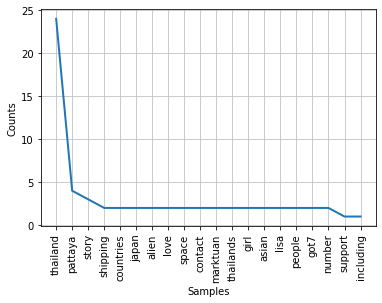

In [ ]:
freq.plot(20, cumulative=False)

word cloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
k = " ".join( t for t in clean_tokens)
k

'support shipping countries including japan thailand tomb raider underworld thailand virtualphotography tombraider crystaldynamics latest pattaya daily popekael aseannowth thailand pattaya places next nothing believe pay month really nice apartment thailand utilities included deposit close beach music clubs everywhere meals alien house story love hope alien intervention set wales thailand space fantasy story extraterrestrial contact conflict man voice alter ego william sure hes going mad trend update influencers thailand today ohmpawatt influence score ohmpawat ยิ้ม5พันของโอมภวัต good morning world goodmorning donnypangilinan enjoy thailand babe take selfies pagod nakong makikitang sapatos pa din nasa igs mo listening faraway title track theotherside album marktuan marktuan traveling thailand recent news scb xbitkub deal falling apart zipmex incident investors thailands digital currency market facing negative outlook icymi frontline crude power thailand’s coup old soldiers almost die t

stemming

In [ ]:
x = k.replace("ohmpawatt", "ohmpawat")
x = x.replace("jaybnowhr", "jayb")
x = x.replace("cdnzarecords", "cdnza")
x = x.replace("เปกผลิตโชค", "peckpalitchoke")
x = x.replace("เป็ก", "peckpalitchoke")
x = x.replace("lalisa", "lisa")
x = x.replace("thailands","thailand")
x = x.replace("thailand's","thailand")
x = x.replace("thailanda","thailand")
x = x.replace("thai","thailand")
x = x.replace("thailandland","thailand")

In [ ]:
x

'support shipping countries including japan thailand tomb raider underworld thailand virtualphotography tombraider crystaldynamics latest pattaya daily popekael aseannowth thailand pattaya places next nothing believe pay month really nice apartment thailand utilities included deposit close beach music clubs everywhere meals alien house story love hope alien intervention set wales thailand space fantasy story extraterrestrial contact conflict man voice alter ego william sure hes going mad trend update influencers thailand today ohmpawat influence score ohmpawat ยิ้ม5พันของโอมภวัต good morning world goodmorning donnypangilinan enjoy thailand babe take selfies pagod nakong makikitang sapatos pa din nasa igs mo listening faraway title track theotherside album marktuan marktuan traveling thailand recent news scb xbitkub deal falling apart zipmex incident investors thailand digital currency market facing negative outlook icymi frontline crude power thailand’s coup old soldiers almost die tha

In [ ]:
word_cloud = WordCloud(max_font_size=100, max_words=20,collocations = False, background_color = 'white').generate(x)

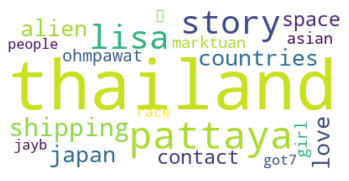

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2 Study Collected Tweets about Weather Sentiment

A collection of collected Twitter datasets: https://github.com/shaypal5/awesome-twitter-data
<br>
Most datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```
We are working with a labeled dataset called *Weather Sentiment* where contributors were asked to grade the sentiment of a particular tweet relating to the weather. You can see the source from https://data.world/crowdflower/weather-sentiment.
<br>
We are reading data from the file 'weather-agg-DFE.csv'.

In [ ]:
import pandas as pd
# Specify the corresponding directory in your drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DW_BDA_Project1/weather-agg-DFE.csv')
print(df.shape) # (#rows, #columns)
print(df.columns)
print(df.head())

(1000, 10)
Index(['_unit_id', '_canary', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',
       'what_emotion_does_the_author_express_specifically_about_the_weather',
       'what_emotion_does_the_author_express_specifically_about_the_weather:confidence',
       'gold_answer', 'tweet_id', 'tweet_text'],
      dtype='object')
    _unit_id  _canary _unit_state  _trusted_judgments _last_judgment_at  \
0  314960380      NaN   finalized                  20      8/24/13 0:21   
1  314960381      NaN   finalized                  20      8/24/13 0:49   
2  314960382      NaN   finalized                  20      8/24/13 0:55   
3  314960383      NaN   finalized                  20      8/24/13 0:48   
4  314960384      NaN   finalized                  20      8/24/13 1:19   

  what_emotion_does_the_author_express_specifically_about_the_weather  \
0                                           Positive                    
1                                           Negative       

Let's analyze tweet texts for each type of the sentiment

In [ ]:
from collections import Counter
Counter(df['what_emotion_does_the_author_express_specifically_about_the_weather'])

Counter({'Positive': 231,
         'Negative': 271,
         'Neutral / author is just sharing information': 261,
         'Tweet not related to weather condition': 235,
         "I can't tell": 2})

We are inspecting tweets labeled as Positive and Negative to understand the relationship between weather and the +/- sentiments

In [ ]:
positive_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Positive']
positive_tweets

0      Grilling kabobs on the grill last night was am...
3      Im going to lunch early today.   The weather i...
5      Passing out now.  working tonight. Storms toda...
9      TGif biatches! Here's to a sunny Friday regard...
16                 It is hot out here but it feels great
                             ...                        
978    I wish I had a girlfriend, this is perfect wea...
981    A'right despite feeling flu-ish im gonna go pl...
982      In Rhode Island and it's a beautiful sunny day!
984    @mention nothing better then woman in warm wea...
995    good morning, it's sunny, pick up new car and ...
Name: tweet_text, Length: 231, dtype: object

In [ ]:
negative_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Negative']
negative_tweets

1      The slowest day ever !! And the weather makes ...
7      @mention s friday at 6 at tha stadium ...if th...
8      I hate this weather. Good day for a movie mara...
10     @mention good crowd in Wrigley today, terrible...
12     in the house washing clothes on this rainy day...
                             ...                        
991    Guess another severe #Thunderstorm is heading ...
992    I wanna do something fun but I don't want to b...
993    Prayers going out to Joplin, Missouri and ever...
997    RT @mention: Do NOT go out to move your car in...
998    Not outside but looking out the window at them...
Name: tweet_text, Length: 271, dtype: object

In [ ]:
neutral_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Neutral / author is just sharing information']
neutral_tweets

2      Fire Weather Watch issued May 17 at 4:21PM CDT...
4      Weekend Weather Causes Delays In I-270 Bridge ...
6      US GAS: Warm-Weather Forecasts Lift Natural Ga...
13     #WEATHER:  2:53 pm : 57.0F. Feels 56F. 30.10% ...
15     ...SHOWERS AND THUNDERSTORMS MOVING SLOWLY OVE...
                             ...                        
980    RT @mention: ...even the weather in OKC is #th...
983    #WEATHER: 8:52 pm C: 76.0F. Feels F. 29.76% Hu...
986                           @mention it's cold outside
988    #WEATHER:  4:53 pm : 89.0F. Feels F. 29.72% Hu...
989    RT @mention: RT @mention: BREAKING: Large, wed...
Name: tweet_text, Length: 261, dtype: object

### Pre-processing Tweets

In [ ]:
type(positive_tweets)

pandas.core.series.Series

In [ ]:
pos = " ".join([t for t in positive_tweets ]) # change serier -> str
pos.lower()

'grilling kabobs on the grill last night was amazing! i\'m so glad this weather is finally  here. im going to lunch early today.   the weather is nice outside so im going to enjoy #metime somewhere pleasant :) passing out now.  working tonight. storms today would be nice. would be great sleeping weather. mmmm tgif biatches! here\'s to a sunny friday regardless of rain and drama! #popularnameregardlessofparticipation it is hot out here but it feels great @mention oh nice! we\'re all the way here in sunny burbank california! hi from sunny boston. weather is fine, wish you were here... (@ joe\'s american bar & grill w/ 2 others) {link} @mention looking forward to your show tonight in salt lake city. the weather is supposed to be great. hopefully you\'ll toss me a pick @mention we can finally compete with your weather in fl! sunny & 70 here in chicago today! .@mention & i just finished an hour jog on the bosque. a little windy, but otherwise a beautiful day. it\'s about time! c\'mon summer

In [ ]:
neg = " ".join([t for t in negative_tweets])  # change serier -> str
neg.lower()

'the slowest day ever !! and the weather makes it even worse ! @mention s friday at 6 at tha stadium ...if tha weather bad its gone be in tha gym at 3 i hate this weather. good day for a movie marathon though... xmen! :d @mention good crowd in wrigley today, terrible weather. tell that redneck that just called in 2 check the reds crowd on a wed. day game in the house washing clothes on this rainy day #bored freezing cold like always whoo buddy excited for tonight let\'s go #11in11 rt @mention: need that warm weather to come back i want the sunshine back, please come back :) @mention if this is what seattle is like, i\'m not surprised somebody killed rosie larsen. everybody must be surly. #thekilling #rain @mention ditto i should have worn shorts today! hello humidity! it\'s hot  as #truck outside in florida, the hotter it is outside, the colder it is inside. freezing at my desk today. eww its 81% humidity  today :i @mention storm? be safe! the weather has been crazy lately! its super a

### Clean tweets

In [ ]:
import re     #เรียกไปแล้วด้านบน
import string

#### possitive

In [ ]:
# Remove link
POS = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', pos.lower())
POS

'grilling kabobs on the grill last night was amazing! i\'m so glad this weather is finally  here. im going to lunch early today.   the weather is nice outside so im going to enjoy #metime somewhere pleasant :) passing out now.  working tonight. storms today would be nice. would be great sleeping weather. mmmm tgif biatches! here\'s to a sunny friday regardless of rain and drama! #popularnameregardlessofparticipation it is hot out here but it feels great @mention oh nice! we\'re all the way here in sunny burbank california! hi from sunny boston. weather is fine, wish you were here... (@ joe\'s american bar & grill w/ 2 others) {link} @mention looking forward to your show tonight in salt lake city. the weather is supposed to be great. hopefully you\'ll toss me a pick @mention we can finally compete with your weather in fl! sunny & 70 here in chicago today! .@mention & i just finished an hour jog on the bosque. a little windy, but otherwise a beautiful day. it\'s about time! c\'mon summer

In [ ]:
# Remove emoji
# Define emoji pattern
emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   "]+", flags = re.UNICODE) #Flag option as Unicode

# Remove emoji
POS = re.sub(emoji, '', POS)
POS


'grilling kabobs on the grill last night was amazing! i\'m so glad this weather is finally  here. im going to lunch early today.   the weather is nice outside so im going to enjoy #metime somewhere pleasant :) passing out now.  working tonight. storms today would be nice. would be great sleeping weather. mmmm tgif biatches! here\'s to a sunny friday regardless of rain and drama! #popularnameregardlessofparticipation it is hot out here but it feels great @mention oh nice! we\'re all the way here in sunny burbank california! hi from sunny boston. weather is fine, wish you were here... (@ joe\'s american bar & grill w/ 2 others) {link} @mention looking forward to your show tonight in salt lake city. the weather is supposed to be great. hopefully you\'ll toss me a pick @mention we can finally compete with your weather in fl! sunny & 70 here in chicago today! .@mention & i just finished an hour jog on the bosque. a little windy, but otherwise a beautiful day. it\'s about time! c\'mon summer

In [ ]:
# Remove and extract @username
re.sub(r'@([a-zA-Z0-9_]+)', '',POS) #Remove @username
re.findall(r'@([a-zA-Z0-9_]+)', POS) #Extract @username


['mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'me

In [ ]:
# Remove and extra beginning with '#'
re.sub(r'#([a-zA-Z0-9ก-๙_]+)', '', POS) #Remove hashtags
re.findall(r'#([a-zA-Z0-9ก-๙_]+)', POS) #Extract hashtags


['metime',
 'popularnameregardlessofparticipation',
 'fail',
 '16',
 'nomorerain',
 'thelandofperfect',
 'shitstorm',
 'cannonbeach',
 'getaway',
 'rain',
 'wx',
 'rain',
 'zebraprint',
 'wannagobw',
 'spring',
 'whereisspring',
 'memphisheat',
 'storm',
 'rockvillefest',
 'allsmiles',
 'grateful',
 'happymonday',
 '12',
 '35',
 'seeyousoon',
 'deepsouth',
 'dreambig',
 'summer2011',
 'friday',
 'ff',
 'boutime',
 'summer',
 'muchado',
 'lakelyn',
 'coffeeup',
 'perfection',
 'smugglerstour',
 'perfectmorning',
 'preakness',
 'fuckyeahsummer',
 'portland',
 'weathermanhasagreenthumb',
 'werockeachothersworlds',
 'sunny',
 'perfect',
 'mnisdope',
 'sunday',
 'eastside',
 'tacoma',
 'teammusso',
 'yeahiamthattype']

In [ ]:
# Remove punctuation
POS = POS.translate(str.maketrans('', '', string.punctuation))
POS

'grilling kabobs on the grill last night was amazing im so glad this weather is finally  here im going to lunch early today   the weather is nice outside so im going to enjoy metime somewhere pleasant  passing out now  working tonight storms today would be nice would be great sleeping weather mmmm tgif biatches heres to a sunny friday regardless of rain and drama popularnameregardlessofparticipation it is hot out here but it feels great mention oh nice were all the way here in sunny burbank california hi from sunny boston weather is fine wish you were here  joes american bar  grill w 2 others link mention looking forward to your show tonight in salt lake city the weather is supposed to be great hopefully youll toss me a pick mention we can finally compete with your weather in fl sunny  70 here in chicago today mention  i just finished an hour jog on the bosque a little windy but otherwise a beautiful day its about time cmon summer nothing says happy cinco de mayo like an ap test and a 

In [ ]:
POSS = [a for a in POS.split()] 
POSS #split // tokken

['grilling',
 'kabobs',
 'on',
 'the',
 'grill',
 'last',
 'night',
 'was',
 'amazing',
 'im',
 'so',
 'glad',
 'this',
 'weather',
 'is',
 'finally',
 'here',
 'im',
 'going',
 'to',
 'lunch',
 'early',
 'today',
 'the',
 'weather',
 'is',
 'nice',
 'outside',
 'so',
 'im',
 'going',
 'to',
 'enjoy',
 'metime',
 'somewhere',
 'pleasant',
 'passing',
 'out',
 'now',
 'working',
 'tonight',
 'storms',
 'today',
 'would',
 'be',
 'nice',
 'would',
 'be',
 'great',
 'sleeping',
 'weather',
 'mmmm',
 'tgif',
 'biatches',
 'heres',
 'to',
 'a',
 'sunny',
 'friday',
 'regardless',
 'of',
 'rain',
 'and',
 'drama',
 'popularnameregardlessofparticipation',
 'it',
 'is',
 'hot',
 'out',
 'here',
 'but',
 'it',
 'feels',
 'great',
 'mention',
 'oh',
 'nice',
 'were',
 'all',
 'the',
 'way',
 'here',
 'in',
 'sunny',
 'burbank',
 'california',
 'hi',
 'from',
 'sunny',
 'boston',
 'weather',
 'is',
 'fine',
 'wish',
 'you',
 'were',
 'here',
 'joes',
 'american',
 'bar',
 'grill',
 'w',
 '2',
 'o

stopword

In [ ]:
import nltk #ข้างบนรันแล้ว

In [ ]:
nltk.download('stopwords') #ข้างบนรันแล้ว

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import urllib.request #ข้างบนรันแล้ว

In [ ]:
from nltk.corpus import stopwords #ข้างบนรันแล้ว

In [ ]:
st = stopwords.words('english')
st.extend(['im', 'last','mmmm','would','heres','mention','hi','link','show','youll','fl','70','47','rt','mmmmmm','lol','0','might','weather','make','going','day','today','week','degree','degrees'])


In [ ]:
print(len(st))

205


In [ ]:
from nltk.corpus import stopwords
ST = st
clean_poss = POSS[:]
# remove stop words
for poss in POSS:
    if poss in ST:   # ถ้า tokens อยู่ ใน stopwords ก็จะ ลบออก
        clean_poss.remove(poss)

In [ ]:
#----------------------------------------------
# Your code starts here
# analyze word frequency in each sentiment type

In [ ]:
# Count word frequency นับ
freqp = nltk.FreqDist(clean_poss)
for key,val in freqp.items():
    print(str(key) + ':' + str(val))

grilling:1
kabobs:1
grill:2
night:10
amazing:4
glad:4
finally:7
lunch:2
early:3
nice:24
outside:16
enjoy:10
metime:1
somewhere:1
pleasant:1
passing:1
working:1
tonight:7
storms:3
great:14
sleeping:1
tgif:1
biatches:1
sunny:45
friday:8
regardless:1
rain:11
drama:1
popularnameregardlessofparticipation:1
hot:8
feels:2
oh:4
way:3
burbank:1
california:1
boston:1
fine:2
wish:2
joes:2
american:2
bar:1
w:2
2:5
others:2
looking:2
forward:2
salt:1
lake:2
city:2
supposed:2
hopefully:2
toss:1
pick:2
compete:1
chicago:2
finished:1
hour:2
jog:1
bosque:1
little:4
windy:2
otherwise:1
beautiful:23
time:8
cmon:1
summer:3
nothing:4
says:1
happy:8
cinco:1
de:1
mayo:1
like:16
ap:1
test:1
rainy:8
fail:1
catch:1
fish:1
folks:3
tomorrow:2
weds:1
downtown:2
farmers:1
market:1
copper:1
river:1
sockeye:1
salmon:1
kind:1
makes:7
want:2
go:5
swimming:1
warm:13
afternoon:4
patio:2
tavern:1
tech:1
center:1
la:2
delicious:2
waiting:4
oh8:1
months:1
joke:1
ive:2
real:1
dirty:1
girl:1
honestly:1
sounds:3
florida:2
neve

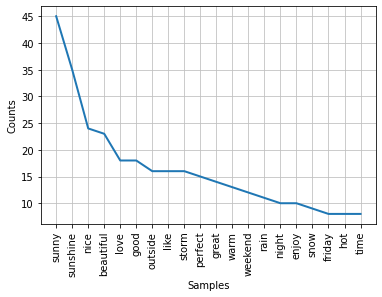

In [ ]:
freqp.plot(20, cumulative=False)

##### word cloud data visualization (poss)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
ps = " ".join( t for t in clean_poss)
ps

'grilling kabobs grill night amazing glad finally lunch early nice outside enjoy metime somewhere pleasant passing working tonight storms nice great sleeping tgif biatches sunny friday regardless rain drama popularnameregardlessofparticipation hot feels great oh nice way sunny burbank california sunny boston fine wish joes american bar grill w 2 others looking forward tonight salt lake city supposed great hopefully toss pick finally compete sunny chicago finished hour jog bosque little windy otherwise beautiful time cmon summer nothing says happy cinco de mayo like ap test rainy fail catch fish folks tomorrow weds downtown farmers market great copper river sockeye salmon great kind makes want go swimming warm sunny afternoon patio tavern tech center nice la sunny delicious waiting oh8 months joke ive real dirty girl honestly sounds like florida never texas compare ps sunny least aint snow sunshine eat yourheart tooim vacation housenice weatherbeautiful sightnothing like sg p tc loved n

stemming

In [ ]:
PS = ps.replace("tonight", "night")
PS = PS.replace("tonights", "night")
PS = PS.replace("grilling", "grill")
PS = PS.replace("grilled", "grill")
PS = PS.replace("rain", "rainy")
PS = PS.replace("rained", "rainy")
PS = PS.replace("sun", "sunshine")
PS = PS.replace("sunshineshine", "sunshine")
PS = PS.replace("sunshineny", "sunshine")
PS = PS.replace("enjoying", "enjoy")


In [ ]:
PS

'grill kabobs grill night amazing glad finally lunch early nice outside enjoy metime somewhere pleasant passing working night storms nice great sleeping tgif biatches sunshine friday regardless rainy drama popularnameregardlessofparticipation hot feels great oh nice way sunshine burbank california sunshine boston fine wish joes american bar grill w 2 others looking forward night salt lake city supposed great hopefully toss pick finally compete sunshine chicago finished hour jog bosque little windy otherwise beautiful time cmon summer nothing says happy cinco de mayo like ap test rainyy fail catch fish folks tomorrow weds downtown farmers market great copper river sockeye salmon great kind makes want go swimming warm sunshine afternoon patio tavern tech center nice la sunshine delicious waiting oh8 months joke ive real dirty girl honestly sounds like florida never texas compare ps sunshine least aint snow sunshine eat yourheart tooim vacation housenice weatherbeautiful sightnothing like

In [ ]:
word_cloudp = WordCloud(max_font_size=100, max_words=20,collocations = False, background_color = 'white').generate(PS)

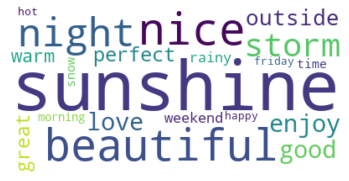

In [ ]:
plt.imshow(word_cloudp, interpolation='bilinear')
plt.axis("off")
plt.show()

#### neg

In [ ]:
# Remove link
NEG = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', neg.lower())
NEG

'the slowest day ever !! and the weather makes it even worse ! @mention s friday at 6 at tha stadium ...if tha weather bad its gone be in tha gym at 3 i hate this weather. good day for a movie marathon though... xmen! :d @mention good crowd in wrigley today, terrible weather. tell that redneck that just called in 2 check the reds crowd on a wed. day game in the house washing clothes on this rainy day #bored freezing cold like always whoo buddy excited for tonight let\'s go #11in11 rt @mention: need that warm weather to come back i want the sunshine back, please come back :) @mention if this is what seattle is like, i\'m not surprised somebody killed rosie larsen. everybody must be surly. #thekilling #rain @mention ditto i should have worn shorts today! hello humidity! it\'s hot  as #truck outside in florida, the hotter it is outside, the colder it is inside. freezing at my desk today. eww its 81% humidity  today :i @mention storm? be safe! the weather has been crazy lately! its super a

In [ ]:
# Remove emoji
# Define emoji pattern
emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   "]+", flags = re.UNICODE) #Flag option as Unicode

# Remove emoji
NEG = re.sub(emoji, '', NEG)
NEG


'the slowest day ever !! and the weather makes it even worse ! @mention s friday at 6 at tha stadium ...if tha weather bad its gone be in tha gym at 3 i hate this weather. good day for a movie marathon though... xmen! :d @mention good crowd in wrigley today, terrible weather. tell that redneck that just called in 2 check the reds crowd on a wed. day game in the house washing clothes on this rainy day #bored freezing cold like always whoo buddy excited for tonight let\'s go #11in11 rt @mention: need that warm weather to come back i want the sunshine back, please come back :) @mention if this is what seattle is like, i\'m not surprised somebody killed rosie larsen. everybody must be surly. #thekilling #rain @mention ditto i should have worn shorts today! hello humidity! it\'s hot  as #truck outside in florida, the hotter it is outside, the colder it is inside. freezing at my desk today. eww its 81% humidity  today :i @mention storm? be safe! the weather has been crazy lately! its super a

In [ ]:
# Remove and extract @username
re.sub(r'@([a-zA-Z0-9_]+)', '',NEG) #Remove @username
re.findall(r'@([a-zA-Z0-9_]+)', NEG) #Extract @username


['mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'mention',
 'me

In [ ]:
# Remove and extra beginning with '#'
re.sub(r'#([a-zA-Z0-9ก-๙_]+)', '', NEG) #Remove hashtags
re.findall(r'#([a-zA-Z0-9ก-๙_]+)', NEG) #Extract hashtags


['bored',
 '11in11',
 'thekilling',
 'rain',
 'truck',
 'today',
 'cubs',
 'giants',
 'dontjudgeme',
 'justcrazy',
 'rapture',
 'pubwrite',
 'ihatestorms',
 'fail',
 'sanfrancisco',
 'decatur',
 'lazytweet',
 'damshame',
 'stupidhot',
 'boston',
 'enoughisenough',
 'weather',
 'mature',
 'freezing',
 'getoverit',
 'fb',
 'chillin',
 'louisville',
 'detroit',
 'detroit',
 'serious',
 'wheresmycoat',
 'teamfollowback',
 'cold',
 'sanfrancisco',
 'run',
 'weather',
 'fb',
 'reds',
 'dumbass',
 'sacrifice',
 'justsayin',
 'chicago',
 'mondays',
 'itsmay',
 'bestdogever',
 'cold',
 'ithoughtitwassummer',
 'krewe',
 'groundhogday',
 'freezing',
 'manchester',
 'utflood',
 'fb',
 'happymonday',
 'twilight',
 'texasweather',
 'thunderstorm',
 'wv',
 'nomorerain',
 'preparenow']

In [ ]:
# Remove punctuation
NEG = NEG.translate(str.maketrans('', '', string.punctuation))
NEG

'the slowest day ever  and the weather makes it even worse  mention s friday at 6 at tha stadium if tha weather bad its gone be in tha gym at 3 i hate this weather good day for a movie marathon though xmen d mention good crowd in wrigley today terrible weather tell that redneck that just called in 2 check the reds crowd on a wed day game in the house washing clothes on this rainy day bored freezing cold like always whoo buddy excited for tonight lets go 11in11 rt mention need that warm weather to come back i want the sunshine back please come back  mention if this is what seattle is like im not surprised somebody killed rosie larsen everybody must be surly thekilling rain mention ditto i should have worn shorts today hello humidity its hot  as truck outside in florida the hotter it is outside the colder it is inside freezing at my desk today eww its 81 humidity  today i mention storm be safe the weather has been crazy lately its super awful here in ok the weather is soo moody its fucki

In [ ]:
NEGA = [a for a in NEG.split()] 
NEGA #split

['the',
 'slowest',
 'day',
 'ever',
 'and',
 'the',
 'weather',
 'makes',
 'it',
 'even',
 'worse',
 'mention',
 's',
 'friday',
 'at',
 '6',
 'at',
 'tha',
 'stadium',
 'if',
 'tha',
 'weather',
 'bad',
 'its',
 'gone',
 'be',
 'in',
 'tha',
 'gym',
 'at',
 '3',
 'i',
 'hate',
 'this',
 'weather',
 'good',
 'day',
 'for',
 'a',
 'movie',
 'marathon',
 'though',
 'xmen',
 'd',
 'mention',
 'good',
 'crowd',
 'in',
 'wrigley',
 'today',
 'terrible',
 'weather',
 'tell',
 'that',
 'redneck',
 'that',
 'just',
 'called',
 'in',
 '2',
 'check',
 'the',
 'reds',
 'crowd',
 'on',
 'a',
 'wed',
 'day',
 'game',
 'in',
 'the',
 'house',
 'washing',
 'clothes',
 'on',
 'this',
 'rainy',
 'day',
 'bored',
 'freezing',
 'cold',
 'like',
 'always',
 'whoo',
 'buddy',
 'excited',
 'for',
 'tonight',
 'lets',
 'go',
 '11in11',
 'rt',
 'mention',
 'need',
 'that',
 'warm',
 'weather',
 'to',
 'come',
 'back',
 'i',
 'want',
 'the',
 'sunshine',
 'back',
 'please',
 'come',
 'back',
 'mention',
 'if'

stopword

In [ ]:
sw = stopwords.words('english')
sw.extend(['im', 'n','would','mention','makes','2','go','please','time','get','rt','got','lol','know','might',
           'weather','make','going','day','today','week','degree','degrees','gonna','away','may','another',
           'link','even','still','come','everyone','need','new','back','think','cant','u','omg','dont','ever'])


In [ ]:
print(len(sw))

220


In [ ]:
from nltk.corpus import stopwords
SW = sw
clean_nega = NEGA[:]
# remove stop words
for nega in NEGA:
    if nega in SW:   # ถ้า tokens อยู่ ใน stopwords ก็จะ ลบออก
        clean_nega.remove(nega)

In [ ]:
#----------------------------------------------
# Your code starts here
# analyze word frequency in each sentiment type

In [ ]:
# Count word frequency นับ
freqn = nltk.FreqDist(clean_nega)
for key,val in freqn.items():
    print(str(key) + ':' + str(val))

slowest:1
worse:1
friday:3
6:2
tha:3
stadium:1
bad:14
gone:3
gym:1
3:2
hate:4
good:7
movie:2
marathon:1
though:5
xmen:1
crowd:2
wrigley:1
terrible:1
tell:1
redneck:1
called:2
check:1
reds:2
wed:1
game:2
house:5
washing:2
clothes:4
rainy:16
bored:1
freezing:27
cold:23
like:20
always:3
whoo:1
buddy:1
excited:1
tonight:3
lets:1
11in11:1
warm:9
want:4
sunshine:8
seattle:1
surprised:1
somebody:1
killed:3
rosie:1
larsen:1
everybody:1
must:3
surly:1
thekilling:1
rain:16
ditto:1
worn:1
shorts:3
hello:2
humidity:6
hot:40
truck:1
outside:30
florida:1
hotter:1
colder:2
inside:6
desk:1
eww:1
81:1
storm:22
safe:2
crazy:8
lately:4
super:4
awful:3
ok:2
soo:2
moody:1
fuckin:3
todays:2
cubsgiants:1
postponed:1
due:2
forecast:5
inclement:1
poor:1
conditions:2
throughout:1
66:1
fucking:7
muthafucker:1
half:1
naked:2
hint:2
windy:9
nowhere:1
fun:4
yet:3
ready:4
lay:1
wit:1
someone:2
elses:1
girlfriend:1
dontjudgeme:1
hi:1
monali:1
nice:3
meet:3
jealous:1
profile:1
picturesure:1
beats:1
dc:1
whats:3
weber:

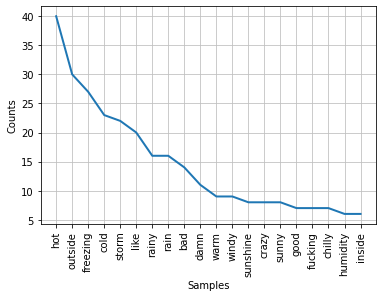

In [ ]:
freqn.plot(20, cumulative=False)

##### word cloud data visualization (neg)

In [ ]:
ng = " ".join( t for t in clean_nega)
ng

'slowest worse friday 6 tha stadium tha bad gone tha gym 3 hate good movie marathon though xmen good crowd wrigley terrible tell redneck called check reds crowd wed game house washing clothes rainy bored freezing cold like always whoo buddy excited tonight lets 11in11 warm want sunshine seattle like surprised somebody killed rosie larsen everybody must surly thekilling rain ditto worn shorts hello humidity hot truck outside florida hotter outside colder inside freezing desk eww 81 humidity storm safe crazy lately super awful ok soo moody fuckin hot todays cubsgiants game postponed due forecast inclement poor conditions throughout 66 fucking muthafucker hot half naked hint windy nowhere super fun yet cold ready lay wit someone elses girlfriend dontjudgeme hi monali nice meet super jealous profile picturesure beats rainy dc whats rainy weber thinking cloudy super cool making xtra sleepy 2day freezing wanna cuddle awwww sounds sad always hot yaw break anywaythats fair want nice probably b

stemming

In [ ]:
NG = ng.replace("worse", "bad")
NG = NG.replace("awful", "bad")
NG = NG.replace("terrible", "bad")
NG = NG.replace("horrible", "bad")
NG = NG.replace("rain", "rainy")
NG = NG.replace("raining", "rainy")
NG = NG.replace("rainyy", "rainy")
NG = NG.replace("raintoo", "rainy")
NG = NG.replace("hotter", "hot")
NG = NG.replace("sun", "sunny")
NG = NG.replace("sunnyny", "sunny")
NG = NG.replace("sunshinenot", "sunny")
NG = NG.replace("sunnyshine", "sunny")
NG = NG.replace("thank", "thanks")
NG = NG.replace("damshame", "damn")
NG = NG.replace("damning", "damn")
NG = NG.replace("shit", "damn")
NG = NG.replace("ugh", "damn")
NG = NG.replace("ughhhhhh", "damn")
NG = NG.replace("fuck", "damn")
NG = NG.replace("ffucked", "damn")
NG = NG.replace("fuckin", "damn")
NG = NG.replace("muthafucker", "damn")
NG = NG.replace("bullshit", "damn")
NG = NG.replace("wtf", "damn")
NG = NG.replace("goddamn", "damn")
NG = NG.replace("dumbass", "damn")
NG = NG.replace("colder", "cold")
NG = NG.replace("cool", "cold")
NG = NG.replace("chilly", "cold")
NG = NG.replace("chillin", "cold")
NG = NG.replace("freezzzinnggg", "freezing")
NG = NG.replace("thunderstorms", "thunderstorm")
NG = NG.replace("storms", "thunderstorm")
NG = NG.replace("storm", "thunderstorm")
NG = NG.replace("stormy", "thunderstorm")
NG = NG.replace("stormdowned", "thunderstorm")
NG = NG.replace("thunderthunderstorm", "thunderstorm")
NG = NG.replace("thunder", "thunderstorm")
NG = NG.replace("thunderstormstorm", "thunderstorm")
NG = NG.replace("dark", "cloudy")

In [ ]:
NG

'slowest bad friday 6 tha stadium tha bad gone tha gym 3 hate good movie marathon thodamn xmen good crowd wrigley bad tell redneck called check reds crowd wed game house washing clothes rainy bored freezing cold like always whoo buddy excited tonight lets 11in11 warm want sunny seattle like surprised somebody killed rosie larsen everybody must surly thekilling rainy ditto worn shorts hello humidity hot truck outside florida hot outside cold inside freezing desk eww 81 humidity thunderstorm safe crazy lately super bad ok soo moody damnin hot todays cubsgiants game postponed due forecast inclement poor conditions throdamnout 66 damning muthadamner hot half naked hint windy nowhere super fun yet cold ready lay wit someone elses girlfriend dontjudgeme hi monali nice meet super jealous profile picturesure beats rainy dc whats rainy weber thinking cloudy super cold making xtra sleepy 2day freezing wanna cuddle awwww sounds sad always hot yaw break anywaythats fair want nice probably bad news

In [ ]:
word_cloudn = WordCloud(max_font_size=100, max_words=20,collocations = False, background_color = 'white').generate(NG)

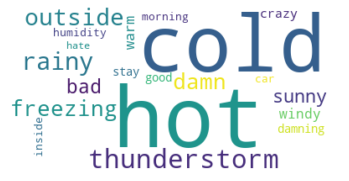

In [ ]:
plt.imshow(word_cloudn, interpolation='bilinear')
plt.axis("off")
plt.show()

### Report 
* How did you analyze the data? 
* What did you find in the data? (please include figures or tables in the report, but no source code)

### 1. How did you analyze the data?

  1.   นำเข้าข้อมูล 'weather-agg-DFE.csv' และเรียกใช้ import ต่างๆ
  2.   เลือกเฉพาะข้อความในทวิต ที่เป็น Possitive Tweets ในคอลัมน์      'what_emotion_does_the_author_express_specifically_about_the_weather' เก็บไว้ในตัวแปร ที่มีชื่อว่า positive_tweets
  3. เลือกเฉพาะข้อความในทวิต ที่เป็น Negative Tweets ในคอลัมน์      'what_emotion_does_the_author_express_specifically_about_the_weather' เก็บไว้ในตัวแปร ที่มีชื่อว่า negative_tweets
  4. ทำการเปลี่ยนประเภทของข้อมูล จาก Series เป็น one long string 
  5. ทำการ Clean Tweets
   - ทำการลบ URL
   - ทำการลบ emoji
   - ทำการลบ @ ออกจาก mention
   - ทำการลบ # 
   - ทำการลบ punctuatin พวก .+*-/*+ 
  6. ทำการ Token โดยการทำ ``.split()`` เพื่อแยก one long string เป็น แต่ละคำ
  7. Stopword นำคำที่ไม่จำเป็น, คำที่ไม่สื่อความหมาย ออก 
  8. ทำการนับและแสดงความถี่ว่าคำๆ ไหนมีมากที่สุด
  9. Word cloud 
     - ทำการต่อ คำ จากตำๆ เดียวเป็น  one long string
     - ทำการแทนค่าคำให้เป็นคำที่ต้องการ (Stemming)
     - ทำ Word cloud //ถ้าเกิด keyword ไม่สามารถ สื่อถึง อารมณ์  Pos/Neg ได้ ให้กลับไปเพิ่มคำ ลงใน stopword (``.extent([])``)
  10. ทำเช่นเดียวกันทั้ง Positive Sentimen และ Negative Sentimen 

    



### What did you find in the data? (please include figures or tables in the report, but no source code)

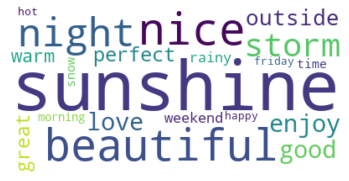

In [ ]:
#positive
plt.imshow(word_cloudp, interpolation='bilinear')
plt.axis("off")
plt.show()

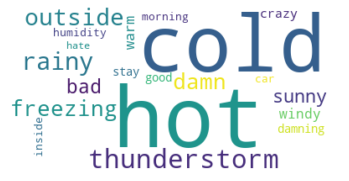

In [ ]:
# negative
plt.imshow(word_cloudn, interpolation='bilinear')
plt.axis("off")
plt.show()

## REFFERENCT

-https://lengyi.medium.com/twitterio-1-thai-text-cleansing-regular-expression-python-abe985b773b4
-https://matplotlib.org/stable/plot_types/index.html